In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

def create_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(*domain, sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

- A trainning set comprising $N=10$ data points $\{\mathbf{x}_i : i = 1,\ldots, N\}$ spaced uniformly in range $[0, 1]$. </n>

- The target data set $t_i$ was obtained by first computing the corresponding values of the function $\sin(2 \pi x_i)$ and then adding a small level of random noise having a Gaussian distribution

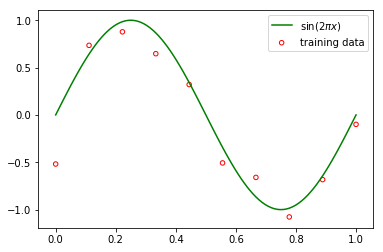

In [2]:
x_train, t_train = create_data(sinusoidal, 10, 0.25)

x_test = np.linspace(0, 1, 100)
t_test = sinusoidal(x_test)

plt.scatter(x_train, t_train, facecolor="none", edgecolor="r", s=20, c="none", label="training data")
plt.plot(x_test, t_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

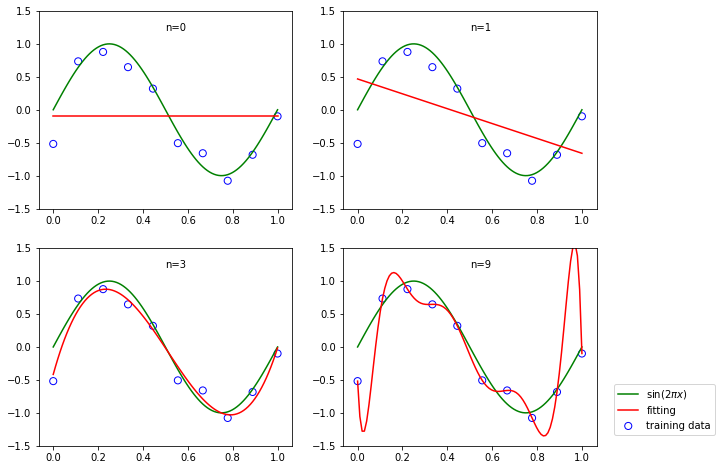

In [3]:
fig = plt.figure(figsize=(10, 8))
for i, degree in enumerate([0, 1, 3, 9]):
    polymodel = np.poly1d(np.polyfit(x_train, t_train, degree)) # np.polyfit uses least-square
    
    plt.subplot(2, 2, i+1)
    plt.scatter(x_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, t_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, polymodel(x_test), c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("n={}".format(degree), xy=(0.5, 1.2))
plt.legend(bbox_to_anchor=(1.05, 0.34), loc=2, borderaxespad=0.5)
plt.show()

The root mean square error (RMSE) is deffined by 

$$E_{RMSE} = \sqrt{\frac{2E_{\mathcal D}(\mathbf{w})}{N}}$$

As the complexity of the model (i.e., degree of polynomial functions) increases, the RMSE of trainning data decreases but the RMSE of the testing data increases.

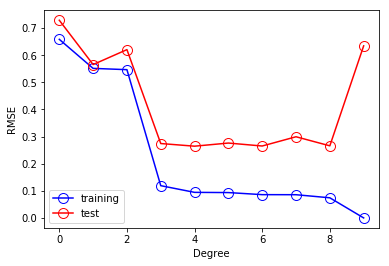

In [4]:
polymodels = [np.poly1d(np.polyfit(x_train, t_train, degree)) for degree in range(10)]
    
training_errors = [np.sqrt(np.mean((t_train - polymodel(x_train)) ** 2)) for polymodel in polymodels]
test_errors = [np.sqrt(np.mean((t_test + np.random.normal(scale=0.25, size=len(x_test)) - polymodel(x_test)) ** 2))
               for polymodel in polymodels]
    
plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="test")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.show()